# Final project. Work done by: Ali Zhuban, Mukhambet Tolegenov BD2007

# Task 1. Descriptive statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
df_codes = pd.read_csv('codes.csv', delimiter=';')
df_types = pd.read_csv('types.csv',delimiter=';')
df_tran = pd.read_csv('transactions.csv',delimiter=';')


In [2]:
tran_type = pd.merge(df_tran,df_types,on='type')
df = pd.merge(tran_type, df_codes, on='code')
df.head()

,client_id,datetime,code,type,sum,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
2,14331004,263 12:57:08,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,2444292,355 09:47:45,6011,2010,-65131.56,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,2132533,184 20:09:07,6011,2010,-224591.58,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...


In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[['client_id','sum']].describe()

,client_id,sum
count,129998.00,129998.00
mean,50868223.28,-18078.07
std,28728559.37,558510.88
min,22899.00,-41500301.14
25%,25771743.00,-22436.70
50%,52358368.00,-5502.49
75%,75063019.00,-1122.96
max,99999680.00,67377473.16


# Task 2. Exploratory Data Analysis

In [4]:
df.shape
# dataset has 129998 rows and 7 columns

(129998, 7)

In [5]:
list(set(df.dtypes.tolist()))
# data has float, integer, and object type values

[dtype('int64'), dtype('float64'), dtype('O')]

In [6]:
df.type.value_counts()

1010    30802
2010    20204
1030    18368
1110    17648
7070    12915
        ...  
7025        1
7035        1
4200        1
1000        1
2341        1
Name: type, Length: 63, dtype: int64

In [7]:
df.code.value_counts()

6011    27917
6010    18684
4814    18641
5411    18490
4829    11423
        ...  
1711        1
5733        1
5172        1
9402        1
2741        1
Name: code, Length: 175, dtype: int64

In [8]:
iqr = df['sum'].quantile(0.75) - df['sum'].quantile(0.25)
df_sum = df[(df['sum'] <  (1.5* iqr)+df['sum'].quantile(0.75))  &   (df['sum'] > df['sum'].quantile(0.25) - (1.5*iqr))]
df_sum['sum'].describe()


count   101277.00
mean     -7935.83
std      13451.62
min     -54351.16
25%     -11903.35
50%      -4491.83
75%      -1572.14
max      30836.42
Name: sum, dtype: float64

C:\Users\Ali\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum', ylabel='Density'>

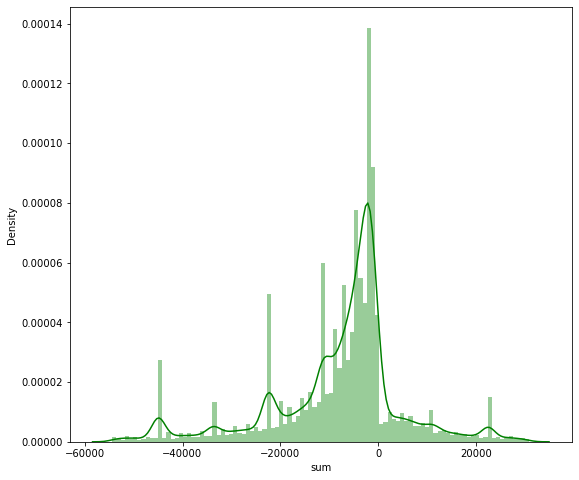

In [9]:
plt.figure(figsize=(9, 8))
sns.distplot(df_sum['sum'], color='g', bins=100, hist_kws={'alpha': 0.4})

Text(0.5, 41.09375, 'a')

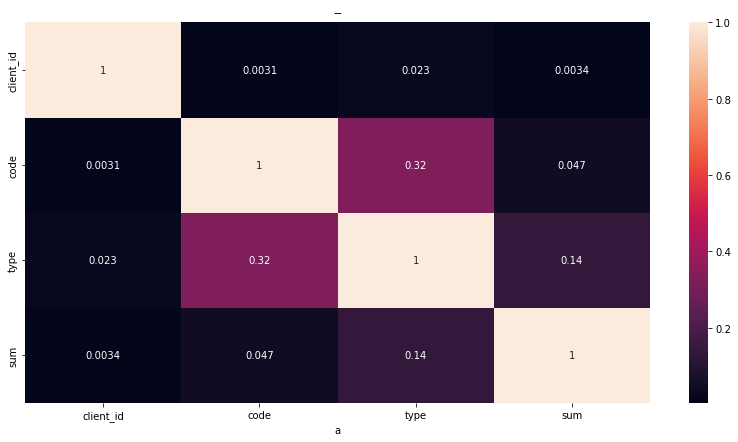

In [10]:
plt.figure(figsize=(14,7))
plt.title('--')
sns.heatmap(data=df.corr(), annot=True)
plt.xlabel('a')

<AxesSubplot:xlabel='type', ylabel='quantity'>

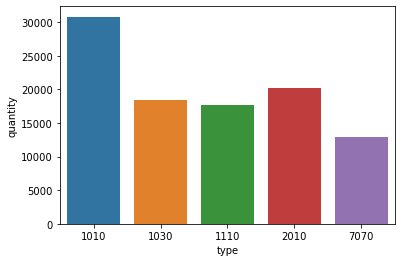

In [11]:
top5_type = df.groupby(['type'])[['client_id']].size().reset_index(name="quantity").sort_values('quantity',ascending=False).head()
sns.barplot(x = top5_type.type, y=top5_type.quantity)
#top5_type

In [12]:
df_types[df_types.type.isin(top5_type.type)]

,type,type_description
21,7070,Перевод на карту (с карты) через Мобильный бан...
52,1030,Оплата услуги. Банкоматы
87,2010,Выдача наличных в АТМ
94,1110,Покупка. POS
122,1010,Покупка. POS


<AxesSubplot:xlabel='code', ylabel='quantity'>

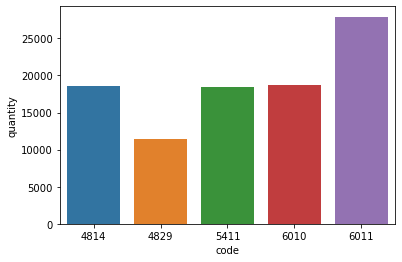

In [13]:
top5_code = df.groupby(['code'])[['client_id']].size().reset_index(name="quantity").sort_values('quantity', ascending=False).head()
sns.barplot(x=top5_code.code, y=top5_code.quantity)

In [14]:
df_codes[df_codes.code.isin(top5_code.code)]

,code,code_description
69,6011,Финансовые институты — снятие наличности автом...
77,4814,"Звонки с использованием телефонов, считывающих..."
151,6010,Финансовые институты — снятие наличности вручную
162,4829,Денежные переводы
167,5411,"Бакалейные магазины, супермаркеты"


# Task 3. Feature Engineering

In [15]:
df = df[df.type_description!='н/д']
df

,client_id,datetime,code,type,sum,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
2,14331004,263 12:57:08,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,2444292,355 09:47:45,6011,2010,-65131.56,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,2132533,184 20:09:07,6011,2010,-224591.58,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
...,...,...,...,...,...,...,...
129993,51907756,136 00:00:00,4131,1200,-146433.71,Покупка. Зарубеж.,Автобусные линии
129994,61978280,401 00:00:00,5169,1200,-271194.78,Покупка. Зарубеж.,"Химикалии и смежные вещества, не классифициров..."
129995,97803699,371 19:47:00,6513,1210,-60792.00,Покупка. POS Зарубеж.,Агенты и менеджеры по аренде недвижимости
129996,63953233,15 00:00:00,4411,1210,-77535.30,Покупка. POS Зарубеж.,Круизные линии


In [16]:
df['time'] = df['datetime'].apply(lambda x: int(x.split().pop(1)[0:2]))

In [17]:
df

,client_id,datetime,code,type,sum,type_description,code_description,time
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,6
1,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,13
2,14331004,263 12:57:08,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,12
3,2444292,355 09:47:45,6011,2010,-65131.56,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,9
4,2132533,184 20:09:07,6011,2010,-224591.58,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,20
...,...,...,...,...,...,...,...,...
129993,51907756,136 00:00:00,4131,1200,-146433.71,Покупка. Зарубеж.,Автобусные линии,0
129994,61978280,401 00:00:00,5169,1200,-271194.78,Покупка. Зарубеж.,"Химикалии и смежные вещества, не классифициров...",0
129995,97803699,371 19:47:00,6513,1210,-60792.00,Покупка. POS Зарубеж.,Агенты и менеджеры по аренде недвижимости,19
129996,63953233,15 00:00:00,4411,1210,-77535.30,Покупка. POS Зарубеж.,Круизные линии,0


In [18]:
df['day'] = df['datetime'].apply(lambda x: int(x.split().pop(0)))

In [19]:
df

,client_id,datetime,code,type,sum,type_description,code_description,time,day
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,6,421
1,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,13,55
2,14331004,263 12:57:08,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,12,263
3,2444292,355 09:47:45,6011,2010,-65131.56,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,9,355
4,2132533,184 20:09:07,6011,2010,-224591.58,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,20,184
...,...,...,...,...,...,...,...,...,...
129993,51907756,136 00:00:00,4131,1200,-146433.71,Покупка. Зарубеж.,Автобусные линии,0,136
129994,61978280,401 00:00:00,5169,1200,-271194.78,Покупка. Зарубеж.,"Химикалии и смежные вещества, не классифициров...",0,401
129995,97803699,371 19:47:00,6513,1210,-60792.00,Покупка. POS Зарубеж.,Агенты и менеджеры по аренде недвижимости,19,371
129996,63953233,15 00:00:00,4411,1210,-77535.30,Покупка. POS Зарубеж.,Круизные линии,0,15


In [20]:
df = df[['client_id','sum','day']].groupby('client_id').mean()

In [21]:
df_train = pd.read_csv('train_set.csv',delimiter=';')[0:100]
df = pd.merge(df, df_train, on='client_id')
df

,client_id,sum,day,target
0,28753,-199215.41,263.38,0
1,760558,-83962.31,350.11,0
2,3258145,-12581.10,261.00,0
3,5741996,-35238.60,206.00,0
4,6506523,49731.20,288.51,0
...,...,...,...,...
95,95213230,6302.73,229.00,0
96,96750247,-25718.57,276.36,0
97,97886931,-87774.33,276.07,1
98,98165114,5688.99,262.70,0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['sum','day']], df.target, test_size = 0.2,random_state = 63)

In [23]:
X_test

,sum,day
64,-174339.21,255.75
59,143893.64,221.43
63,-18163.84,220.29
2,-12581.10,261.00
80,-67938.96,379.00
20,-4693.47,364.22
18,-69174.21,166.00
48,-377785.49,142.00
72,-107939.55,212.29
51,-14696.78,272.42


# task 4

In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(179.35714285714286, 210.645, 'day <= 200.0\ngini = 0.41\nsamples = 80\nvalue = [57, 23]'),
 Text(163.4142857142857, 197.055, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(195.3, 197.055, 'sum <= -18676.02\ngini = 0.454\nsamples = 66\nvalue = [43, 23]'),
 Text(119.57142857142857, 183.465, 'sum <= -21229.867\ngini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(103.62857142857143, 169.875, 'sum <= -183183.914\ngini = 0.492\nsamples = 32\nvalue = [18, 14]'),
 Text(87.68571428571428, 156.285, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(119.57142857142857, 156.285, 'sum <= -69349.387\ngini = 0.498\nsamples = 30\nvalue = [16, 14]'),
 Text(63.77142857142857, 142.695, 'day <= 244.715\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(31.885714285714286, 129.10500000000002, 'day <= 205.25\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(15.942857142857143, 115.515, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(47.82857142857143, 115.515, 'gini = 0.0\nsamples = 2\nvalue 

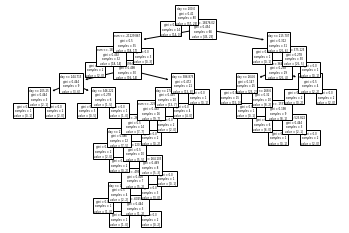

In [25]:
from sklearn.tree import plot_tree 
%matplotlib inline

plot_tree(model, feature_names = X_train.columns)

In [26]:
model.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [27]:
y_test

64    1
59    0
63    0
2     0
80    0
20    0
18    0
48    1
72    0
51    1
89    1
75    0
77    0
33    0
66    1
31    0
12    0
94    1
92    1
55    0
Name: target, dtype: int64

In [28]:
accuracy_score(y_test,model.predict(X_test))

0.65

In [29]:
## random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_predicted = rf.predict(X_test)
y_predicted

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [31]:
accuracy_score(y_test,y_predicted)

0.65

In [32]:
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(RandomForestClassifier(),X=X_train,y=y_train, param_name='n_estimators', param_range=np.arange(1, 10, 1), cv=3)


In [33]:
param_range=np.arange(1, 10, 1)

In [35]:
from sklearn.metrics import roc_curve, auc

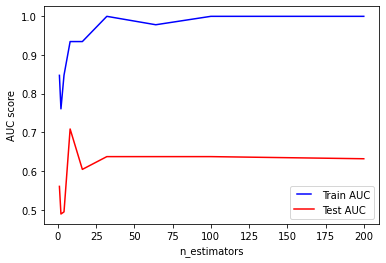

In [36]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [46]:
rf2 = RandomForestClassifier(n_estimators=13)
rf2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=13)

In [47]:
y_true = y_test
y_predicted = rf2.predict(X_test)
y_predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [48]:
accuracy_score(y_test,y_predicted)

0.75

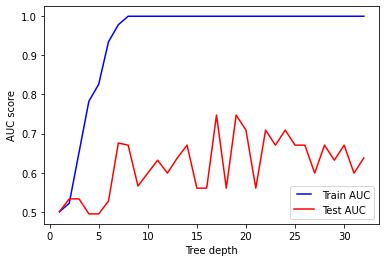

In [40]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [55]:
rf2 = RandomForestClassifier(n_estimators=60,max_depth=18)
rf2.fit(X_train, y_train)
y_true = y_test
y_predicted = rf2.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [56]:
accuracy_score(y_test,y_predicted)

0.8

# task 5

In [63]:
conf = confusion_matrix(y_true, y_predicted)

In [65]:
conf

array([[12,  1],
       [ 3,  4]], dtype=int64)

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_predicted))

roc_auc_score for DecisionTree:  0.7472527472527473


In [67]:
precision = conf[0][0]/(conf[0][0] + conf[0][1])
precision

0.9230769230769231

In [68]:
recall = conf[0][0]/(conf[0][0]+conf[1][0])
recall

0.8